In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('../data/SYB64_313_202110_Threatened Species.csv')

In [4]:
species.head()

,T23,Threatened species,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
2,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
3,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
4,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34,NaN,"World Conservation Union (IUCN), Gland and Cam..."


In [5]:
species = species.rename(columns = {'Threatened species': 'Country',
                                    'Unnamed: 2': 'Year', 
                                    'Unnamed: 3': 'Threatened Species Type', 
                                    'Unnamed: 4': 'Count', 
                                    'Unnamed: 6': 'Source'})
species

,T23,Country,Year,Threatened Species Type,Count,Unnamed: 5,Source
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
2,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
3,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
4,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34,NaN,"World Conservation Union (IUCN), Gland and Cam..."
...,...,...,...,...,...,...,...
6916,716,Zimbabwe,2015,Threatened Species: Total (number),60,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6917,716,Zimbabwe,2018,Threatened Species: Total (number),95,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6918,716,Zimbabwe,2019,Threatened Species: Total (number),103,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6919,716,Zimbabwe,2020,Threatened Species: Total (number),122,NaN,"World Conservation Union (IUCN), Gland and Cam..."


In [15]:
species_usa = species[species['Country'] == 'United States of America']


In [20]:
species_usa_plants = species_usa[species_usa['Threatened Species Type'] == 'Threatened Species: Plants (number)']

In [38]:
species_usa_plants = species_usa_plants[species_usa_plants['Year'] >= '2018']


In [39]:
species_usa_plants = species_usa_plants.rename(columns = {'Threatened Species Type': 'Plants', 'Count': 'Plant Total'})


In [24]:
species_usa_vertebrates = species_usa[species_usa['Threatened Species Type'] == 'Threatened Species: Vertebrates (number)']

In [28]:
species_usa_vertebrates = species_usa_vertebrates[species_usa_vertebrates['Year'] >= '2018']


In [41]:
species_usa_vertebrates = species_usa_vertebrates.rename(columns = {'Threatened Species Type': 'Vertebrates', 'Count': 'Vertebrate Total'})

In [30]:
species_usa_invertebrates = species_usa[species_usa['Threatened Species Type'] == 'Threatened Species: Invertebrates (number)']

In [32]:
species_usa_invertebrates = species_usa_invertebrates[species_usa_invertebrates['Year'] >= '2018']


In [44]:
species_usa_invertebrates = species_usa_invertebrates.rename(columns = {'Threatened Species Type': 'Invertebrates', 'Count': 'Invertebrate Total'})

In [46]:
species_usa = pd.merge(species_usa_plants, species_usa_vertebrates, how = 'outer')

In [48]:
species_usa = pd.merge(species_usa, species_usa_invertebrates, how = 'outer')

In [52]:
species_usa = species_usa.drop(columns= ['T23', 'Unnamed: 5', 'Source'])

In [53]:
species_usa

,Country,Year,Plants,Plant Total,Vertebrates,Vertebrate Total,Invertebrates,Invertebrate Total
0,United States of America,2018,Threatened Species: Plants (number),498,Threatened Species: Vertebrates (number),462,Threatened Species: Invertebrates (number),580
1,United States of America,2019,Threatened Species: Plants (number),556,Threatened Species: Vertebrates (number),479,Threatened Species: Invertebrates (number),581
2,United States of America,2020,Threatened Species: Plants (number),587,Threatened Species: Vertebrates (number),482,Threatened Species: Invertebrates (number),586
3,United States of America,2021,Threatened Species: Plants (number),735,Threatened Species: Vertebrates (number),506,Threatened Species: Invertebrates (number),600


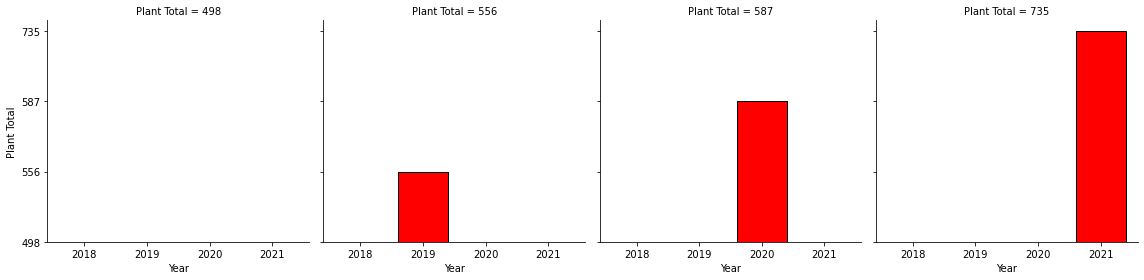

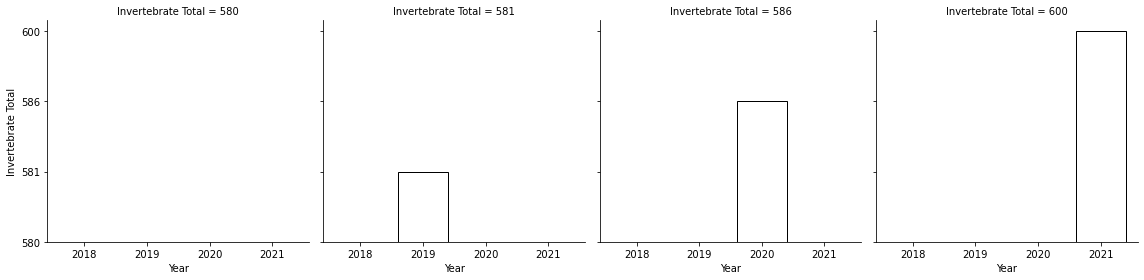

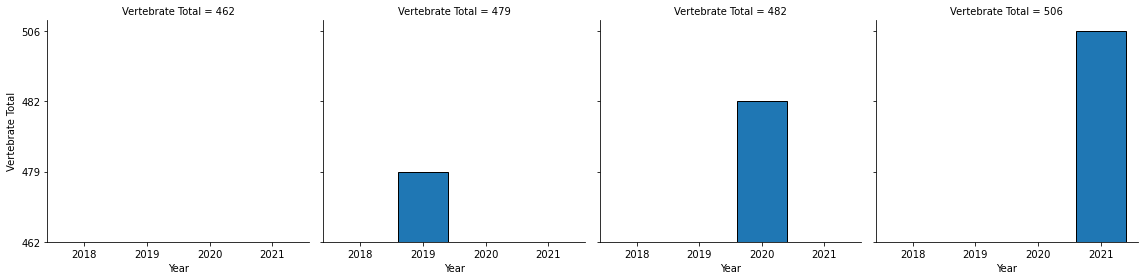

In [91]:
species_usa_Facet = sns.FacetGrid(species_usa, col = 'Plant Total', height = 4, aspect = 1)
species_usa_Facet.map(plt.bar, 'Year', 'Plant Total', edgecolor = 'black', color = 'red'),
species_usa_Facet = sns.FacetGrid(species_usa, col = 'Invertebrate Total', height = 4, aspect = 1)
species_usa_Facet.map(plt.bar, 'Year', 'Invertebrate Total', edgecolor = 'black', color = 'white'),
species_usa_Facet = sns.FacetGrid(species_usa, col = 'Vertebrate Total', height = 4, aspect = 1)
species_usa_Facet.map(plt.bar, 'Year', 'Vertebrate Total', edgecolor = 'black')


In [168]:
usa_ghg_90_20 = pd.read_csv('../data/usa_ghg_90_20.csv')

In [169]:
usa_ghg_90_20 = usa_ghg_90_20.dropna()

In [207]:
usa_ghg_90_20 = usa_ghg_90_20.rename(index = {'Unspecified mix of HFCs and PFCs':'Unknown HFCs & PFCs'})
usa_ghg_90_20 = usa_ghg_90_20.drop(17)

<AxesSubplot:title={'center':'US Green House Gases (GHG) Comparison: 1990 & 2020 '}, xlabel='Gases'>

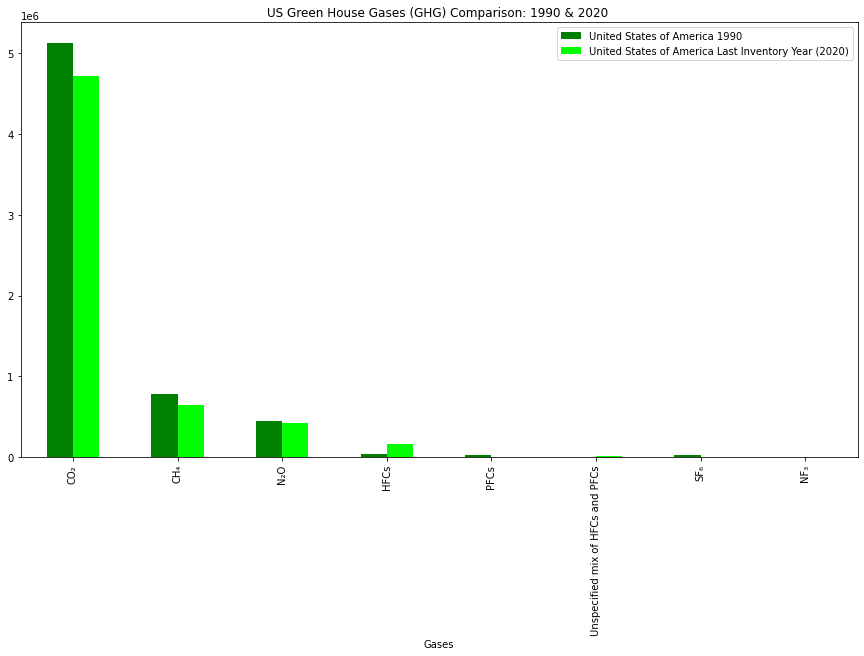

In [268]:
usa_ghg_90_20.plot(kind = 'bar', x = 'Gas', 
                   color = ['green', 'lime'],
                   xlabel = 'Gases', 
                   title = 'US Green House Gases (GHG) Comparison: 1990 & 2020 ',
                   figsize = (15,8))

In [224]:
usa_ghg_90_20 = pd.read_csv('../data/usa_ghg_90_20.csv')


In [232]:
usa_ghg_90_20 = usa_ghg_90_20.dropna()

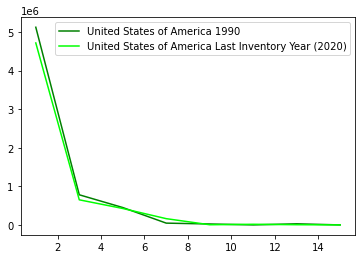

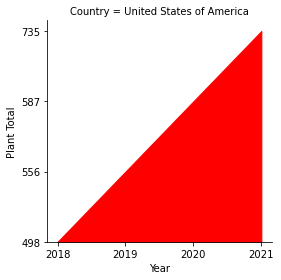

In [386]:
usa_ghg_90_20.plot(color = ['green', 'lime'])
species_usa_Facet = sns.FacetGrid(species_usa, col = 'Country', height = 4, aspect = 1)
species_usa_Facet.map(plt.stackplot, 'Year', 'Plant Total', edgecolor = 'black', color = 'red')



